# PCA 적용 다중 분류 (Seeds)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 준비

In [ ]:
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']

In [ ]:
df=pd.read_csv('seeds_dataset.txt', sep='\s+',names=columns)
df.shape

(210, 8)

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 2. 정보 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   asymmetry    210 non-null    float64
 6   groove       210 non-null    float64
 7   class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
class,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [ ]:
df['class'].value_counts()

,count
class,
1,70
2,70
3,70


## 데이터 분리

In [ ]:
x = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split


x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
type(x_train), type(x_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## 5. 학습

### 베이스 모델

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
pca.fit(x_train_scaled)

PCA(n_components=2)

## 6. 테스트

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Import a classifier

pca = PCA(n_components=2)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca.fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

model = LogisticRegression()
model.fit(x_train_pca, y_train)

y_pred = model.predict(x_test_pca)

In [ ]:
pca.get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

## 7. 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred) # Assign the result to a variable (e.g., cm)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False) # Use the assigned variable
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.9048, prec: 0.9167, recall: 0.9048, f1: 0.9000


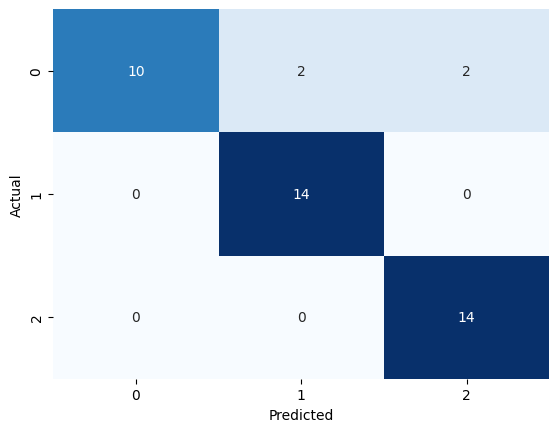

In [ ]:
print_metrics(y_test, y_pred)